# 评价模型

## 评价模型介绍

我们常常会遇到如下的综合评价问题：**在若干个(同类)对象中，从多个维度对其进行评分，将这些评分综合后，给定一个最终排名**。如好大学排名，运动员排名，城市排名等。


```{figure} https://cdn.kesci.com/upload/image/qg32efllvm.jpg?imageView2/0
---
height: 300px
name: directive-fig
---

```

 这时候我们就需要用到评价模型，评价模型是数学建模比赛中最基础也是最常用的模型, 例如[2018年HiMCM A题](https://www.comap.com/highschool/contests/himcm/2018problems.html) 就专门考察了评价模型。

:::: {admonition} 2018HiMCM-A

There are several Roller Coaster rating/ranking sites online that, while taking some objective measures into account, heavily rely on subjective input to determine the rating or ranking of a particular roller coaster (e.g., an "excitement"or "experience" score of an "expert" rider to measure "thrill").

In addressing this HiMCM problem, consider only roller coasters currently in operation. We have provided data for a subset of operating roller coasters whose height, speed, and/or drop are above the average of worldwide operating coasters. Therefore, we have not included family or kiddie coasters, nor have we included bobsled or mountain type coasters.



::: {admonition} 数据下载地址
[点我下载](https://www.comap.com/highschool/contests/himcm/COMAP_RollerCoasterData_2018.xlsx)
:::

1. Create an objective quantitative algorithm or set of algorithms to develop a descriptive roller coaster rating/ranking system based only on roller coaster numerical and descriptive specification data (e.g., speed, duration of ride, steel or wood, drop).
2. Use your algorithm(s) to develop your "Top 10 Roller Coasters in the World" list. Compare and discuss the rating/ranking results and descriptions from your team's algorithm(s) with at least two other rating/ranking systems found online.
3. Describe the concept and design for a user-friendly app that uses your algorithm(s) to help a potential roller coaster rider find a roller coaster that she or he would want to ride. NOTE: You DO NOT need to program and/or write code for the app. You are developing the concept and design for the app only.
4. Write a one-page non-technical News Release describing your new algorithm, results, and app.




::::

如何去思考综合评价问题的建模呢？通常有如下五个角度


- **评价对象**：评价对象就是综合评价问题中所研究的对象，或称为系统。通常情况下，在一个问题中评价对象是属于同一类的，且个数要大于1，不妨假设一个综合评价问题中有$n$个评价对象，分别记为

$$
S_{1}, S_{2}, \cdots, S_{n}(n>1)
$$

- **评价指标**：评价指标是反映评价对象的运行（或发展）状况的基本要素。通常的问题都是有多项指标构成，每一项指标都是从不同的侧面刻画系统所具有某种特征大小的一个度量。一个综合评价问题的评价指标一般可用一个向量$x$表示，称为评价指标问题，其中每一个分量就是从一个侧面反映系统的状态，即称为综合评价的指标体系。不失一般性，设系统有$m$个评价指标，分别记为

$$
x_{1}, x_{2}, \cdots, x_{m}(m>1)
$$

- **权重系数**： 每一个综合评价问题都有相应的评价目的，针对某种评价目的，各评价指标之间的相对重要性是不同的，评价指标之间的这种相对重要性的大小，可用权重系数来刻画。当各评价对象和评价指标值都确定以后，综合评价结果就依赖于权重系数的取值了，即**权重系数确定的合理与否，直接关系到综合评价结果的可信度，甚至影响到最后决策的正确性**。因此，权重系数的确定要特别谨慎，应按一定的方法和原则来确定。如果用$w_{j}(j=1,2, \cdots, m)$来表示评价指标$x_j$的权重系数，一般应满足

$$
w_{j} \geq 0, j=1,2, \cdots, m
$$


$$
\sum_{j=1}^{m} w_{j}=1
$$

- **综合模型** 对于多指标（或多因素）的综合评价问题，就是要通过建立一定的数学模型将多个评价指标值综合成为一个整体的综合评价值，作为综合评价的依据，从而得到相应的评价结果。

- **评价者** 评价者是直接参与评价的人，可以是一个人，也可以是一个团体。对于评价目的选择、评价指标体系确定、权重系数的确定和评价模型的建立都与评价者有关。因此，评价者在评价过程中的作用是不可小视的。

目前国内外综合评价方法有数十种之多，其中主要使用的评价方法有
 - 主成分分析法
 - 因子分析
 - **TOPSIS**
 - 秩和比法
 - 灰色关联法
 - **熵权法**
 - **层次分析法**
 - 模糊评价法
 - 物元分析法
 - 聚类分析法
 - 价值工程法
 - 神经网络法等

方法多样，各自有其适用场景。本次课程，我们重点展开讲其中较为常用的**TOPSIS、熵权法和层次分析法**。


在展开这三个模型之前，我们首先来看一下数据的预处理方法。

## 数据预处理方法

一般情况下，在综合评价指标中，有的指标比较重要，有的影响微乎其微，另外各指标值可能属于不同类型、不同单位或不同数量级，从而使得各指标之间存在着不可公度性，给综合评价带来了诸多不便。为了尽可能地反映实际情况，消除由于各项指标间的这些差别带来的影响，避免出现不合理的评价结果，就需要对评价指标进行一定的预处理，包括

1. [**指标的筛选**](content:choose_1)
1. [**指标的一致化处理**](content:choose_2)
1. [**无量纲化处理**](content:choose_3)
1. [**定性数据定量化**](content:choose_4)

下面分别介绍。

(content:choose_1)=
### 评价指标的筛选

要根据综合评价的目的，针对具体的评价对象、评价内容收集有关指标信息，采用适当的筛选方法对指标进行筛选，合理地选取主要指标，剔除次要指标，以简化评价指标体系。常用的评价指标筛选方法主要有专家调研法、**最小均方差法、极大极小离差法**等。我们重点来看后两种方法。

#### 最小均方差法

对于$n$个评价对象$S_{1}, S_{2}, \cdots, S_{n}$，每个评价对象有$m$个指标，其观测值分别为

$$
a_{i j}(i=1,2, \cdots, n ; j=1,2, \cdots, m)
$$

```{hint}
最小均方差法的出发点是： 如果$n$个评价对象关于某项指标的观测值都差不多，那么不管这个评价指标重要与否，对于这$n$个评价对象的评价结果所起的作用将是很小的。因此，在评价过程中就可以删除这样的评价指标。
```

最小均方差法的筛选过程如下：

- 首先求出第$j$项指标的平均值和均方差

$$
\mu_{j}=\frac{1}{n} \sum_{i=1}^{n} a_{i j}
$$

$$
s_{j}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(a_{i j}-\mu_{j}\right)^{2}}, \quad j=1,2, \cdots, m
$$

- 求出最小均方差

$$
{S}_{j_{0}}=\min _{1 \leq j \leq m}\left\{{s}_{j}\right\}
$$

- 如果最小均方差$S_{j_{0}} \approx 0$，则可删除与$S_{j_{0}}$对应的指标 。考察完所有指标，即可得到最终的评价指标体系。

``` {Warning}
注意：最小均方差法只考虑了指标的差异程度，也有可能将重要的指标删除。你能否举一个例子?
```

#### 极大极小离差法

对于$n$个评价对象$S_{1}, S_{2}, \cdots, S_{n}$，每个评价对象有$m$个指标，其观测值分别为

$$
a_{i j}(i=1,2, \cdots, n ; j=1,2, \cdots, m)
$$

极大极小离差法的筛选过程如下：
- 求出第$j$项指标的最大离差

$$
d_{j}=\max _{1 \leq i,k \leq n}\left\{\left|a_{i j}-a_{k j}\right|\right\}, j=1,2, \cdots, m
$$

- 求出最小离差

$$
d_{j_{0}}=\min _{1 \leq j \leq n}\left\{d_{j}\right\}
$$

- 如果最小离差$d_{j_{0}} \approx 0$，则可删除与$d_{j_{0}}$对应的指标$x_{j_{0}}$，考察完所有指标，即可得到最终的评价指标体系。

其他几个常用的评价指标筛选方法还有条件广义方差极小法、极大不相关法等，这里限于篇幅不再展开。

(content:choose_2)=
### 指标的一致化处理

所谓一致化处理就是将评价指标的类型进行统一。

一般来说，在评价指标体系中，可能会同时存在极大型指标、极小型指标、居中型指标和区间型指标，它们都具有不同的特点。

若指标体系中存在不同类型的指标，必须在综合评价之前将评价指标的类型做一致化处理。

例如，将各类指标都转化为极大型指标，或极小型指标。一般的做法是将非极大型指标转化为极大型指标。

#### 极小型指标化为极大型指标

对极小型指标$x_j$，将其转化为极大型指标时，只需对指标$x_j$取倒数：

$$
x_{j}^{\prime}=\frac{1}{x_{j}}
$$

或做平移变换：

$$
x_{j}^{\prime}=M_{j}-x_{j}
$$

其中,$M_{j}=\max _{1 \leq i \leq n}\left\{a_{i j}\right\}$,即$n$个评价对象第$j$项指标值$a_{ij}$最大者。

当然，其他能改变单调性的转换方法也是可行的。

#### 居中型指标化为极大型指标

对居中型指标$x_j$,令$M_{j}=\max _{1 \leq i \leq n}\left\{a_{i j}\right\}, \quad m_{j}=\min _{1 \leq i \leq n}\left\{a_{i j}\right\}$,取

$$
x_{j}^{\prime}=\left\{\begin{array}{ll}
{\frac{2\left(x_{j}-m_{j}\right)}{M_{j}-m_{j}},} & {m_{j} \leq x_{j} \leq \frac{M_{j}+m_{j}}{2}} \\
{\frac{2\left(M_{j}-x_{j}\right)}{M_{j}-m_{j}},} & {\frac{M_{j}+m_{j}}{2} \leq x_{j} \leq M_{j}}
\end{array}\right.
$$

就可以将$x_j$转化为极大型指标。

#### 区间型指标化为极大型指标

对区间型指标$x_j$， $x_j$是取值介于区间$\left[b_{j}^{(1)}, b_{j}^{(2)}\right]$,内时为最好，指标值离该区间越远就越差。令

$$
M_{j}=\max _{1 \leq i \leq n}\left\{a_{i j}\right\}, \quad m_{j}=\min _{\| \leq i \leq n}\left\{a_{i j}\right\}, \quad c_{j}=\max \left\{b_{j}^{(1)}-m_{j}, M_{j}-b_{j}^{(2)}\right\}
$$

就可以将区间型指标$x_j$转化为极大型指标。

$$
x_{j}'=\left\{\begin{array}{lll}
{1-\dfrac{b_{j}^{(1)}-x_{j}}{c_{j}},} & {x_{j} < b_{j}^{(1)}} \\
{1,} & {b_{j}^{(1)} \leq x_{j} \leq b_{j}^{(2)}} \\
{1-\dfrac{x_{j}-b_{j}^{(2)}}{c_{j}},} & {x_{j} > b_{j}^{(2)}}
\end{array}\right.
$$

(content:choose_3)=
### 指标的无量纲化处理

**所谓无量纲化，也称为指标的规范化，是通过数学变换来消除原始指标的单位及其数值数量级影响的过程。**

因此，就有指标的实际值和评价值之分。一般地，将指标无量纲化处理以后的值称为指标评价值。


无量纲化过程就是将指标实际值转化为指标评价值的过程。

对于$n$个评价对象$S_{1}, S_{2}, \cdots, S_{n}$，每个评价对象有$m$个指标，其观测值分别为

$$
a_{i j}(i=1,2, \cdots, n ; j=1,2, \cdots, m)
$$

#### 标准样本变换法

令

$$
a_{i j}^{*}=\frac{a_{i j}-\mu_{j}}{s_{j}}(1 \leq i \leq n, 1 \leq j \leq m)
$$

其中样本均值$\mu_{j}=\frac{1}{n} \sum_{i=1}^{n} a_{i j}$,样本均方差$s_{j}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(a_{i j}-\mu_{j}\right)^{2}}$,称为标准观测值。

#### 比例变换法

对于极大型指标，令

$$
a_{i j}^{*}=\frac{a_{i j}}{\max _{1 \leq i \leq n} a_{i j}}\left(\max _{1 \leq i \leq n} a_{i j} \neq 0,1 \leq i \leq n, 1 \leq j \leq m\right)
$$

对极小型指标，令

$$
a_{i j}^{*}=\frac{\min a_{i j}}{a_{i j}}(1 \leq i \leq n, 1 \leq j \leq m)
$$

或

$$
a_{i j}^{*}=1-\frac{a_{i j}}{\max _{1 \leq i \leq n} a_{i j}}\left(\max _{1 \leq i \leq n} a_{i j} \neq 0,1 \leq i \leq n, 1 \leq j \leq m\right)
$$

该方法的优点是这些变换前后的属性值成比例。但对任一指标来说，变换后的$a_{i j}^{*} = 1$和$a_{i j}^{*}= 0$不一定同时出现。

#### 向量归一化法

对于极大型指标，令

$$
a_{i j}^{*}=\frac{a_{i j}}{\sqrt{\sum_{i=1}^{n} a_{i j}^{2}}}(i=1,2, \cdots, n, 1 \leq j \leq m)
$$


对于极小型指标，令

$$
a_{i j}^{*}=1-\frac{a_{i j}}{\sqrt{\sum_{i=1}^{n} a_{i j}^{2}}}(i=1,2, \cdots, n, 1 \leq j \leq m)
$$

#### 极差变换法
对于极大型指标

$$
a_{i j}^{*}=\frac{a_{i j}-\min _{1 \leq i \leq n} a_{i j}}{\max _{1 \leq i \leq n} a_{i j}-\min _{1 \leq i \leq n} a_{i j}}(1 \leq i \leq n, 1 \leq j \leq m)
$$

对于极小型直指标

$$
a_{i j}^{*}=\frac{\max _{1 \leq i \leq n} a_{i j}-a_{i j}}{\max _{1 \leq i \leq n} a_{i j}-\min _{1 \leq i \leq n} a_{i j}}(1 \leq i \leq n, 1 \leq j \leq m)
$$


其特点为经过极差变换后，均有$0 \leq a_{i j}^{*} \leq 1$，且最优指标值$a_{i j}^{*}=1$，最劣指标值$a_{i j}^{*}=0$。该方法的缺点是变换前后的各指标值不成比例。


#### 功效系数法

令，

$$
a_{i j}^{*}=c+\frac{a_{i j}-\min _{1 \leq i \leq n} a_{i j}}{\max _{1 \leq i \leq n} a_{i j}-\min _{1 \leq i \leq n} a_{i j}} \times d(1 \leq i \leq n, 1 \leq j \leq m)
$$

其$c,d$均为确定的常数，$c$表示“平移量”，表示指标实际基础值， $d$表示“旋转量”，即表示“放大”或“缩小”倍数

(content:choose_4)=
### 定性指标的定量化

在综合评价工作中，有些评价指标是定性指标，即只给出定性的描述，例如，质量很好、性能一般、可靠性高等。对于这些指标，在进行综合评价时，必须先通过适当的方式进行赋值，使其量化。一般来说，对于指标最优值可赋值1，对于指标最劣值可赋值0。对极大型定性指标常按以下方式赋值。


对于极大型定性指标而言，如果指标能够分为很低、低、一般、高和很高五个等级，则可以分别取量化值为0，0.1，0.3，0.5，0.7，1，对应关系如下表所示。介于两个等级之间的可以取两个分值之间的适当数值作为量化值。极小型指标同理。

| 等级   | 很低 | 低  | 一般 | 高  | 很高 |
|--------|------|-----|------|-----|------|
| 量化值 | 0    | 0.3 | 0.5  | 0.7 | 0.9  |

下面我们通过几个例子来学习三种常用的评价模型。分别是TOPSIS方法，熵权法和层次分析法。

## TOPSIS方法

C.L.Hwang 和 K.Yoon 于1981年首次提出 TOPSIS (全称：Technique for Order Preference by Similarity to an Ideal Solution)。

TOPSIS 法是一种常用的组内综合评价方法，能充分利用原始数据的信息，其结果能精确地反映各评价方案之间的差距。

基本过程为基于归一化后的原始数据矩阵，采用余弦法找出有限方案中的**最优方案和最劣方案**，然后分别计算各评价对象与最优方案和最劣方案间的距离，获得各评价对象与最优方案的相对接近程度，以此作为评价优劣的依据。


该方法对数据分布及样本含量没有严格限制，数据计算简单易行。

为了客观地评价我国研究生教育的实际状况和各研究生院的教学质量，国务院学位委员会办公室组织过一次研究生院的评估。为了取得经验，先选5所研究生院，收集有关数据资料进行了试评估，下表是所给出的部分数据：


![Image Name](https://cdn.kesci.com/upload/image/q36cu5oq77.png?imageView2/0/w/500/h/500)

**Step1**: 指标的筛选，经过观察，该数据不需要进行指标的筛选。

**Step2**: 指标的一致化处理。通过分析，我们知道：

- 人均专著，越多越好（极大型指标）
- 科研经费，越多越好（极大型指标）
- 逾期毕业率，越小越好（极小型指标）
- 生师比，过大过小都不好（区间型指标）

设研究生院的生师比最佳区间为$[5,6]$，在最佳区间内生师比得分为1 ，如果生师比小于2或者大于12都是0分，在其他的区间都按照线性关系进行变换。

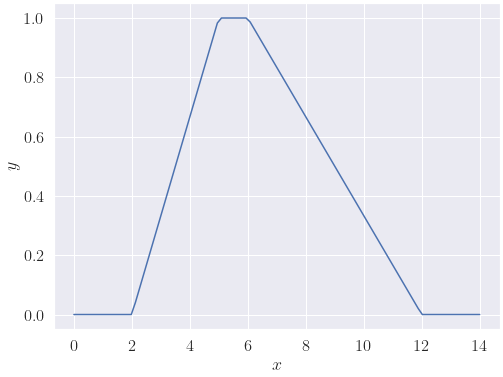

In [1]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
x_list = np.linspace(0,14,100)
y_list = []
import seaborn as sns
sns.set(font_scale=1.5)
for x in x_list:
    if x <= 2:
        y_list.append(0)
    elif x>2 and x<=5:
        y_list.append( (x-2)*1/3 )
    elif x>5 and x<=6:
        y_list.append(1)
    elif x>6 and x<=12:
        y_list.append( 1 - (x-6)*1/6 )
    elif x>12:
        y_list.append(0)
plt.figure(figsize=(8,6))
plt.plot(x_list,y_list)
plt.xlabel('$x$');
plt.ylabel('$y$');

因此，我们把两个极大型指标保持不变，对极小型指标采用取倒数操作，对区间型指标使用上面介绍的处理方法。处理结果见下图。

![Image Name](https://cdn.kesci.com/upload/image/q36dpsx5kl.png?imageView2/0/w/400/h/400)

**Step3**:无量纲处理。以 "人均专著" 属性为例，我们使用向量归一化方法：

$$
\begin{aligned}
&0.1 / \sqrt{0.1^{2}+0.2^{2}+0.4^{2}+0.9^{2}+1.2^{2}}=0.0637576713063384\\
&0.2 / \sqrt{0.1^{2}+0.2^{2}+0.4^{2}+0.9^{2}+1.2^{2}}=0.12751534261266767\\
&0.4 / \sqrt{0.1^{2}+0.2^{2}+0.4^{2}+0.9^{2}+1.2^{2}}=0.2550306852253334\\
&\begin{array}{l}
{0.9 / \sqrt{0.1^{2}+0.2^{2}+0.4^{2}+0.9^{2}+1.2^{2}}=0.5738190417570045} \\
{1.2 / \sqrt{0.1^{2}+0.2^{2}+0.4^{2}+0.9^{2}+1.2^{2}}=0.7650920556760059}
\end{array}
\end{aligned}
$$

使用同样的向量归一化方法，我们可以对其他三个指标也进行无量纲化处理，得到如下表所示的结果


![Image Name](https://cdn.kesci.com/upload/image/q37a7zebvn.png?imageView2/0/w/400/h/400)

**Step4**: 选出其中的最优方案和最劣方案。

![Image Name](https://cdn.kesci.com/upload/image/q37a9tyx43.png?imageView2/0/w/400/h/400)

**Step5**: 计算每一个学校，与最优方案以及最劣方案之间的距离

$$
\begin{array}{l}
{D_{i}^{+}=\sqrt{\sum_{j=1}^{m} w_{j}\left(Z_{j}^{+}-z_{i j}\right)^{2}}} \\
{D_{i}^{-}=\sqrt{\sum_{j=1}^{m} w_{j}\left(Z_{j}^{-}-z_{i j}\right)^{2}}}
\end{array}
$$

然后使用如下的评价函数将其综合起来

$$
C_{i}=\frac{D_{i}^{-}}{D_{i}^{+}+D_{i}^{-}}
$$


```{admonition} 思考
如果理想中最好的大学是真实存在的，其得分$C_i$应该等于几，为什么？如果是理想中最差的大学真实存在呢？
```

**Step6**: 最终评价结果如下


![Image Name](https://cdn.kesci.com/upload/image/q37aduhn3h.png?imageView2/0/w/640/h/640)


当然，直接看结果可能不够直观，我们来通过一张雷达图解释这个评价的结果。

In [2]:
import plotly.graph_objects as go

categories = ['人均专著','生师比','科研经费','逾期毕业率']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.063758,0.597022,0.344901,0.275343],
      theta=categories,
      fill='toself',
      name='院校 A'
))
fig.add_trace(go.Scatterpolar(
      r=[0.127, 0.597,0.413,0.231],
      theta=categories,
      fill='toself',
      name='院校 B'
))

fig.add_trace(go.Scatterpolar(
      r=[0.255,0.497,0.482,0.193],
      theta=categories,
      fill='toself',
      name='院校 C'
))


fig.add_trace(go.Scatterpolar(
      r=[0.573,0.199,0.689,0.562],
      theta=categories,
      fill='toself',
      name='院校 D'
))

fig.add_trace(go.Scatterpolar(
      r=[0.765,0,0.027,0.718],
      theta=categories,
      fill='toself',
      name='院校 E'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
#       range=[0, 5]
    )),
  showlegend=True
)

fig

上面是通过举例来进行TOPSIS方法的实现，关于TOPSIS方法的更详细理论推导，参考[这里](https://wiki.mbalib.com/wiki/TOPSIS%E6%B3%95)。

在实际论文撰写的过程中，最好理论性强一些，而不是像我们上面一样简单地代入数据计算。

``` {admonition} 思考
上面的TOPSIS方法的权重已经给出，请思考，如果实际建模的时候没有给出权重，应该如何选取？
```

## 熵权法

下面我们来学习一种客观赋权的方法：熵权法（ Entropy Weight Method），它是一种突出局部差异的客观赋权方法。因为它的权重选取仅依赖于数据本身的离散性。

```{tip}
通俗来说可以这么理解熵权法：熵权法认为离散性越大的变量，其在评价中的重要性越突出。
```


我们通过一个例子来看。

某医院为了提高自身的护理水平，对拥有的11个科室进行了考核，考核标准包括9项整体护理，并对护理水平较好的科室进行奖励。下表是对各个科室指标考核后的评分结果。


![Image Name](https://cdn.kesci.com/upload/image/q37bu55zpt.png?imageView2/0/w/640/h/640)

但是由于各项护理的难易程度不同，因此需要对9项护理进行赋权，以便能够更加合理的对各个科室的护理水平进行评价。根据原始评分表，对数据进行归一化后可以得到下列数据归一化表


![Image Name](https://cdn.kesci.com/upload/image/q37bvhlzaq.png?imageView2/0/w/640/h/640)

``` {admonition} 思考
这里我们用了什么归一化的方法？
```



计算第$j$项指标下第$i$个样本值所占比重

$$
p_{i j}=\frac{x_{i j}}{\displaystyle \sum_{i=1}^{n} x_{i j}}, \quad i=1, \cdots, n, j=1, \cdots, m
$$

计算第$j$个指标的熵值(熵值的计算方法是信息论中的定义，这里我们直接采用)

$$
e_{j}=-k \sum_{i=1}^{n} p_{i j} \ln \left(p_{i j}\right), \quad j=1, \cdots, m
$$

其中，

$$
k=1 / \ln (n)>0
$$


![Image Name](https://cdn.kesci.com/upload/image/q37c01lxpn.png?imageView2/0/w/640/h/640)

可以发现，熵值越小的变量，离散程度越大。接下来，我们计算信息熵冗余度，并将其归一化得到权重

$$
d_{j}=1-e_{j}, \quad j=1, \cdots, m
$$

$$
w_{j}=\frac{d_{j}}{\displaystyle\sum_{j=1}^{m} d_{j}}, \quad j=1, \cdots, m
$$


![Image Name](https://cdn.kesci.com/upload/image/q37c2m8er3.png?imageView2/0/w/640/h/640)



加权求和计算指标综合评分

$$
s_{i}=\sum_{j=1}^{m} w_{j} x_{i j}, \quad i=1, \cdots, n
$$


![Image Name](https://cdn.kesci.com/upload/image/q37c42bx6w.png?imageView2/0/w/640/h/640)

上面是一个特殊的案例，接下来我们来总结熵权法的一般步骤。

**熵权法步骤**

- 对$n$个样本，$m$个指标的数据集

$$
\{x_{ij}|i = 1,2,\cdots,n, \quad j = 1,2,\cdots,m\}
$$

- 对指标进行归一化处理：异质指标同质化
- 计算第$j$项指标下第$i$个样本值所占比重


$$
p_{i j}=\frac{x_{i j}}{\displaystyle\sum_{i=1}^{n} x_{i j}}, \quad i=1, \cdots, n, j=1, \cdots, m
$$

-  计算第$j$个指标的熵值


$$
e_{j}=-k \sum_{i=1}^{n} p_{i j} \ln \left(p_{i j}\right), \quad j=1, \cdots, m
$$

其中，


$$
k=1 / \ln (n)>0
$$


-  计算信息熵冗余度，并将其归一化得到权重


$$
d_{j}=1-e_{j}, \quad j=1, \cdots, m
$$

$$
w_{j}=\frac{d_{j}}{\displaystyle\sum_{j=1}^{m} d_{j}}, \quad j=1, \cdots, m
$$

- 计算指标综合评分

$$
s_{i}=\sum_{j=1}^{m} w_{j} x_{i j}, \quad i=1, \cdots, n
$$
这里的$x_{ij}$是标准化以后的数据。

```{admonition} 思考
1. 熵权法是客观赋权，这里的**客观**就一定是优于主观的吗？经过熵权法计算得到的权重，应用中会不会有什么问题？
2. 熵权法中用的是熵来衡量变量的离散程度，除此之外之外，你还可以思考方差是不是也能达到类似的效果？
```


## 层次分析法

AHP (Analytic Hierarchy Process)层次分析法是美国运筹学家Saaty教授于二十世纪80年代提出的一种实用的多方案或多目标的决策方法。其主要特征是，它合理地将定性与定量的决策结合起来，按照思维、心理的规律把决策过程层次化、数量化。 该方法自1982年被介绍到我国以来，以其定性与定量相结合地处理各种决策因素的特点，以及其系统灵活简洁的优点，迅速地在我国社会经济各个领域内，如能源系统分析、城市规划、经济管理、科研评价等，得到了广泛的重视和应用。

层次分析法的基本思路：先分解后综合首先将所要分析的问题层次化，根据问题的性质和要达到的总目标，将问题分解成不同的组成因素，按照因素间的相互关系及隶属关系，将因素按不同层次聚集组合，形成一个多层分析结构模型，最终归结为最低层（方案、措施、指标等）相对于最高层（总目标）相对重要程度的权值或相对优劣次序的问题。 运用层次分析法建模，大体上可按下面四个步骤进行： 

- 建立递阶层次结构模型； 
- 构造出各层次中的所有判断矩阵； 
- 层次单排序及一致性检验； 
- 层次总排序及一致性检验。

我们一样通过一个案例来学习层次分析法。

人们在日常生活中经常会碰到多目标决策问题，例如假期某人想要出去旅游，现有三个目的地（方案）：

- 风光绮丽的杭州（P1）
- 迷人的北戴河（P2）
- 山水甲天下的桂林（P3）

假如选择的标准和依据（行动方案准则）有5个：景色，费用，饮食，居住和旅途。则常规思维的方式如下：


```{figure} ../_static/lecture_specific/evaluation_model/ahp2.png
---
width: 700px
name: ahp_2
align: center
---

```

通过相互比较确定各准则对于目标的权重，即构造判断矩阵。在层次分析法中，为使矩阵中的各要素的重要性能够进行定量显示，引进了矩阵判断标度（1～9标度法） :

```{figure} ../_static/lecture_specific/evaluation_model/ahp.png
---
width: 700px
name: ahp_matrix
align: center
---

```

构造判断矩阵

![Image Name](https://cdn.kesci.com/upload/image/q37b0ivv9d.png?imageView2/0/w/960/h/960)


我们以其中的一个判断矩阵（景色）为例，介绍判断矩阵的构建方法。对于有三个城市的景色对比来说，在$B_1$矩阵中，第$i$行第$j$列表示第$i$个城市，相比比第$j$个城市，按照1-9标度法得到的比较值。

$$
B_1 = \left[\begin{matrix} 
\dfrac{w_1}{w_1} & \dfrac{w_1}{w_2} &\dfrac{w_1}{w_3} \\
\dfrac{w_2}{w_1} & \dfrac{w_2}{w_2} &\dfrac{w_2}{w_3}  \\
\dfrac{w_3}{w_1} & \dfrac{w_3}{w_2} &\dfrac{w_3}{w_3} 
\end{matrix}  \right]
$$

比如，

$$
B_1 = \left[\begin{matrix} 
1 & 2 &5 \\
1/2 &1 &2 \\
1/5 & 1/2& 1
\end{matrix}  \right]
$$

- 可以肯定的是，对角线元素都是1，因为自己比自己的重要性肯定是相等的
-  第一行第二列的2则表示杭州相比北戴河，景色要稍微好一些（程度为2）
-  第一行第三列的5则表示杭州相比桂林，景色要明显好一些（程度为5）
-  第二行第三列的2则表示北戴河相比桂林，景色要稍微好一些（程度为2）
-  沿对角线对称位置的元素互为倒数也就是$a_{ij} a_{ji} = 1$


如果我们设每一个城市景色的重要性为$w = [w_1,w_2,w_3]$的话，上述的$B_1$矩阵有一个非常有趣的性质为

$$
B_1 w = 3w
$$

我们后续将通过这个性质求解$w = [w_1,w_2,w_3]$，也就是每一个城市在景色上的得分。


```{admonition} 思考
- 请你尝试证明上面的$B_1 w = 3w$
- 对于更一搬的$n\times n$的判断矩阵而言，请证明$A w = nw$
```

### 层次单排序和总排序

所谓层次单排序是指，对于上层某因素而言，本层次因素重要性的排序。
具体计算方法为：对于判断矩阵$B$，计算满足

$$
BW=\lambda_{max} W
$$

的特征根与特征向量。

式中，$\lambda_{max}$ 为矩阵$B$的最大特征跟根，$W$为对应于$\lambda_{max}$的特征向量，$W$的分量$w_i$即为相应元素单排序的权值。

下面介绍使用python求解矩阵的特征值与特征向量的方法：

In [3]:
## 矩阵的输入
A = [[1,2,5],[1/2,1,2],[1/5,1/2,1]]
A

[[1, 2, 5], [0.5, 1, 2], [0.2, 0.5, 1]]

In [4]:
# 调用 np.linalg.eig方法计算矩阵的特征值和特征向量，其中lamb是特征值，v是特征向量
import numpy as np
lamb,v = np.linalg.eig(A)      
print(lamb)

[ 3.00553511e+00+0.j         -2.76755587e-03+0.12895082j
 -2.76755587e-03-0.12895082j]


In [5]:
lambda_max = max(abs(lamb))                    # 提取最大的特征值
loc = np.where(lamb == lambda_max)             # 获取最大特征值的索引

In [6]:
weight = abs(v[0:len(A),loc[0][0]])            # 获取最大特征值对应的特征向量
weight = weight/sum(weight)  # 归一化
weight

array([0.59537902, 0.27635046, 0.12827052])

对于其他的判断矩阵也可以执行类似的操作。最终的计算结果如下图{numref}`Figure {number}<ahp_3>`

```{figure} ../_static/lecture_specific/evaluation_model/ahp3.png
---
width: 600px
name: ahp_3
align: center
---
AHP计算结果图
```



进行层次总排序即可得到最终的打分结果

$$
W=W^{(3)} W^{(2)}=\left(\begin{array}{ccccc}
{0.595} & {0.082} & {0.429} & {0.633} & {0.166} \\
{0.277} & {0.236} & {0.429} & {0.193} & {0.166} \\
{0.129} & {0.682} & {0.142} & {0.175} & {0.668}
\end{array}\right)\left(\begin{array}{c}
{0.263} \\
{0.475} \\
{0.055} \\
{0.099} \\
{0.110}
\end{array}\right)=\left(\begin{array}{c}
{0.300} \\
{0.246} \\
{0.456}
\end{array}\right)
$$

决策结果是首选旅游地为$P_3$ ,其次为$P_1$，再次$P_2$

### 判断一致性

判断矩阵通常是不一致的，但是为了能用它的对应于特征根的特征向量作为被比较因素的权向量，其不一致程度应在容许的范围内.如何确定这个范围？ 

```{admonition} 思考
为什么说判断矩阵通常是不一致的？你是否能举个例子
```



一致性指标：

$$
C I=\frac{\lambda-n}{n-1}
$$

$$
C R=\frac{C I}{R I}
$$


![Image Name](https://cdn.kesci.com/upload/image/q37bi9mx9r.png?imageView2/0/w/960/h/960)

当$CR<0.1$时，认为层次排序是具有满意的一致性的，我们可以接受该分析结果。

In [7]:
A = [[1,2,5],[1/2,1,2],[1/5,1/2,1]]
# 调用 np.linalg.eig方法计算矩阵的特征值和特征向量，其中lamb是特征值，v是特征向量
lamb,v = np.linalg.eig(A)      
lambda_max = max(abs(lamb))                    # 提取最大的特征值
loc = np.where(lamb == lambda_max)             # 获取最大特征值的索引
weight = abs(v[0:len(A),loc[0][0]])            # 获取最大特征值对应的特征向量
weight = weight/sum(weight) 
RI_list = [0 ,0 ,0.58,0.9,1.12,1.24,1.32,1.41,1.45]   
RI = RI_list[len(A)-1]                        # 计算RI
CI = (lambda_max - len(A))/(len(A)-1)         # 计算CI
CR = CI / RI                                   # 计算CR
print('最大特征值 lambda_max=',lambda_max)
print('最大特征值对应的特征向量 w=',weight)
print('CI=',CI)
print('RI=',RI)
print('CR=',CR)

最大特征值 lambda_max= 3.0055351117384985
最大特征值对应的特征向量 w= [0.59537902 0.27635046 0.12827052]
CI= 0.0027675558692492608
RI= 0.58
CR= 0.00477164805042976


### 案例：企业的资金使用


![Image Name](https://cdn.kesci.com/upload/image/q37bozvxls.png?imageView2/0/w/960/h/960)

构造判断矩阵

$$
A=\left(\begin{array}{ccc}{1} & {1 / 5} & {1 / 3} \\ {5} & {1} & {3} \\ {3} & {1 / 3} & {1}\end{array}\right)
$$

$$
B_{1}=\left(\begin{array}{ccccc}{1} & {2} & {3} & {4} & {7} \\ {1 / 3} & {1} & {3} & {2} & {5} \\ {1 / 5} & {1 / 3} & {1} & {1 / 2} & {1} \\ {1 / 4} & {1 / 2} & {2} & {1} & {3} \\ {1 / 7} & {1 / 5} & {1 / 2} & {1 / 3} & {1}\end{array}\right) \quad B_{2}=\left(\begin{array}{cccc}{1} & {1 / 7} & {1 / 3} & {1 / 5} \\ {7} & {1} & {5} & {3} \\ {3} & {1 / 5} & {1} & {1 / 3} \\ {5} & {1 / 2} & {3} & {1}\end{array}\right) \quad B_{3}=\left(\begin{array}{cccc}{1} & {1} & {3} & {3} \\ {1} & {1} & {3} & {3} \\ {1 / 3} & {1 / 3} & {1} & {1} \\ {1 / 3} & {1 / 3} & {1} & {1}\end{array}\right)
$$

In [8]:
# 层次分析法函数
import numpy as np
def AHP(A):
    lamb,v = np.linalg.eig(A)                      # 调用 np.linalg.eig方法计算矩阵的特征值和特征向量，其中lamb是特征值，v是特征向量
    lambda_max = max(abs(lamb))                    # 提取最大的特征值
    loc = np.where(lamb == lambda_max)             # 获取最大特征值的索引
    weight = abs(v[0:len(A),loc[0][0]])            # 获取最大特征值对应的特征向量
    weight = weight/sum(weight) 
    RI_list = [0 ,0 ,0.58,0.9,1.12,1.24,1.32,1.41,1.45]   
    RI = RI_list[len(A)-1]                        # 计算RI
    CI = (lambda_max - len(A))/(len(A)-1)         # 计算CI
    CR = CI / RI                                   # 计算CR
    print('最大特征值 lambda_max=',lambda_max)
    print('最大特征值对应的特征向量 w=',weight)
    print('CI=',CI)
    print('RI=',RI)
    print('CR=',CR)
    return weight,CI,RI,CR

In [9]:
A = np.array([[1, 1/5, 1/3],
            [5,  1,    3],
            [3, 1/3,   1]])            # 输入判断矩阵
weight,CI,RI,CR = AHP(A)

最大特征值 lambda_max= 3.038511090558167
最大特征值对应的特征向量 w= [0.10472943 0.63698557 0.25828499]
CI= 0.019255545279083464
RI= 0.58
CR= 0.03319921599841977


In [10]:
B1 = np.array([[1, 2, 3, 4, 7],
             [1/3, 1, 3, 2, 5],
             [1/5, 1/3, 1, 1/2, 1],
             [1/4, 1/2, 2, 1, 3],
             [1/7, 1/5, 1/2, 1/3, 1]])     # 输入判断矩阵
weight,CI,RI,CR = AHP(B1)

最大特征值 lambda_max= 4.788701831199925
最大特征值对应的特征向量 w= [0.45854793 0.25579548 0.08094312 0.15003772 0.05467574]
CI= -0.05282454220001864
RI= 1.12
CR= -0.04716476982144521


In [11]:
B2 = np.array([[1, 1/7, 1/3, 1/5],
              [7,  1, 5 , 3],
              [3, 1/5, 1, 1/3],
              [5, 1/2, 3 , 1]])             # 输入判断矩阵
weight,CI,RI,CR = AHP(B2)

最大特征值 lambda_max= 4.204930164418752
最大特征值对应的特征向量 w= [0.05388566 0.55493915 0.11390801 0.27726717]
CI= 0.06831005480625052
RI= 0.9
CR= 0.07590006089583391


In [12]:
B3 = np.array([[1,1,3,3],
             [1,1,3,3],
             [1/3, 1/3, 1, 1],
              [1/3,1/3,1,1]])     # 输入判断矩阵
weight,CI,RI,CR = AHP(B3)

最大特征值 lambda_max= 3.9999999999999996
最大特征值对应的特征向量 w= [0.375 0.375 0.125 0.125]
CI= -1.4802973661668753e-16
RI= 0.9
CR= -1.644774851296528e-16


最后经过层次总排序即可得到最终的打分排名结果

![Image Name](https://cdn.kesci.com/upload/image/q37bsjooi.png?imageView2/0/w/960/h/960)

## 评价模型总结

评价问题的流程：
1. 筛选指标
2. 指标一致化和无量纲化
3. 确定权重
4. 使用合适的综合评价方法，加权综合求评分,得到结果


``` {tip}
- 优先选择客观方法，但也具有其局限性
- 如果选用了主观方法（AHP）,需要做一致性检验和敏感性分析
```